----------------------------------------------------
**NOTA** deberías poner la semilla inicialmente para que todos los métodos utilizaran la misma.

----------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
with open('dataset2.pickle', 'rb') as data:
    dataset = pickle.load(data)

In [3]:
print(dataset['names'])
print(dataset['data'].shape)

['mean_scr_eda', 'max_scr_eda', 'min_scr_eda', 'skewness_eda', 'kurtosis_eda', 'mean_der1_eda', 'std_der1_eda', 'mean_der2_eda', 'std_der2_eda', 'mean_peaks_eda', 'max_peaks_eda', 'min_peaks_eda', 'alsc_result_eda', 'insc_result_eda', 'apsc_result_eda', 'rmsc_result_eda', 'mean_ecg', 'median_ecg', 'std_ecg', 'skewness_ecg', 'kurtosis_ecg', 'rmssd_ecg', 'sdsd_ecg', 'sdrr_rmssd_ecg', 'pNN50_ecg', 'pNN20_ecg', 'SD1_ecg', 'SD2_ecg', 'rel_rr_mean_ecg', 'rel_rr_median_ecg', 'rel_rr_std_ecg', 'rel_rr_skewness_ecg', 'rel_rr_kurtosis_ecg', 'vlf_power_ecg', 'lf_power_ecg', 'hf_power_ecg', 'lf_hf_ecg', 'stress_lvl']
(1129, 38)


In [4]:
df = pd.DataFrame(dataset['data'], columns = dataset['names'])
df["stress_lvl"] = dataset['data'][:,-1]
X = df.drop("stress_lvl",1)   #Feature Matrix
y = df["stress_lvl"]          #Target Variable
df.head()
df = df.astype(float)
df

,mean_scr_eda,max_scr_eda,min_scr_eda,skewness_eda,kurtosis_eda,mean_der1_eda,std_der1_eda,mean_der2_eda,std_der2_eda,mean_peaks_eda,...,rel_rr_mean_ecg,rel_rr_median_ecg,rel_rr_std_ecg,rel_rr_skewness_ecg,rel_rr_kurtosis_ecg,vlf_power_ecg,lf_power_ecg,hf_power_ecg,lf_hf_ecg,stress_lvl
0,0.039430,0.128732,0.000000,0.282615,-0.551564,3.020514e-06,0.000629,-4.452812e-08,0.000770,12623.400000,...,0.023363,0.015368,0.180463,2.440260,9.907214,5.921498,0.692732,0.00083,7.093942,2.0
1,0.008732,0.033880,0.000000,1.481765,1.819165,7.855454e-08,0.000057,-1.975113e-07,0.000070,10514.090909,...,0.009576,-0.012448,0.227057,-0.607533,6.727662,5.922275,0.692732,0.00083,7.093836,2.0
2,0.006453,0.045247,0.000000,2.450174,5.388206,1.438320e-08,0.000206,-9.892778e-07,0.000252,9386.736842,...,-0.002805,0.018974,0.103026,-0.528390,0.183056,5.920893,0.692732,0.00083,7.093920,2.0
3,0.003862,0.014270,-0.001295,1.086098,-0.067820,2.182056e-08,0.000004,2.024127e-08,0.000004,11092.300000,...,-0.005371,0.012021,0.085906,-0.425322,-0.069309,5.921228,0.692732,0.00083,7.093966,2.0
4,-0.001715,0.000005,-0.019893,-2.878847,7.640970,5.218873e-12,0.000097,4.736449e-07,0.000119,11004.433333,...,0.002963,0.009479,0.095681,-0.840264,1.088233,5.920445,0.692732,0.00083,7.093909,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1124,0.009327,0.052809,0.000000,2.380972,5.091006,1.000302e-07,0.000223,-9.884547e-07,0.000273,11670.153846,...,0.023274,0.013147,0.163207,2.810229,13.255234,5.920195,0.692732,0.00083,7.093938,1.0
1125,0.008880,0.045516,-0.000169,1.501245,1.361324,1.618867e-08,0.000065,-2.964876e-07,0.000079,11771.857143,...,0.007869,0.008909,0.062376,-0.139879,-0.138402,5.919296,0.692732,0.00083,7.093869,1.0
1126,0.003267,0.010347,0.000000,1.068417,-0.113052,5.475826e-08,0.000043,-1.539648e-07,0.000052,10724.448276,...,-0.008631,-0.005929,0.049777,-0.183716,-0.436470,5.919653,0.692732,0.00083,7.093886,1.0
1127,0.010770,0.083400,0.000000,2.633944,6.845124,7.259552e-07,0.000407,-1.259759e-06,0.000499,10598.833333,...,-0.002556,-0.013553,0.095299,-1.086056,1.956265,5.920500,0.692732,0.00083,7.093936,1.0


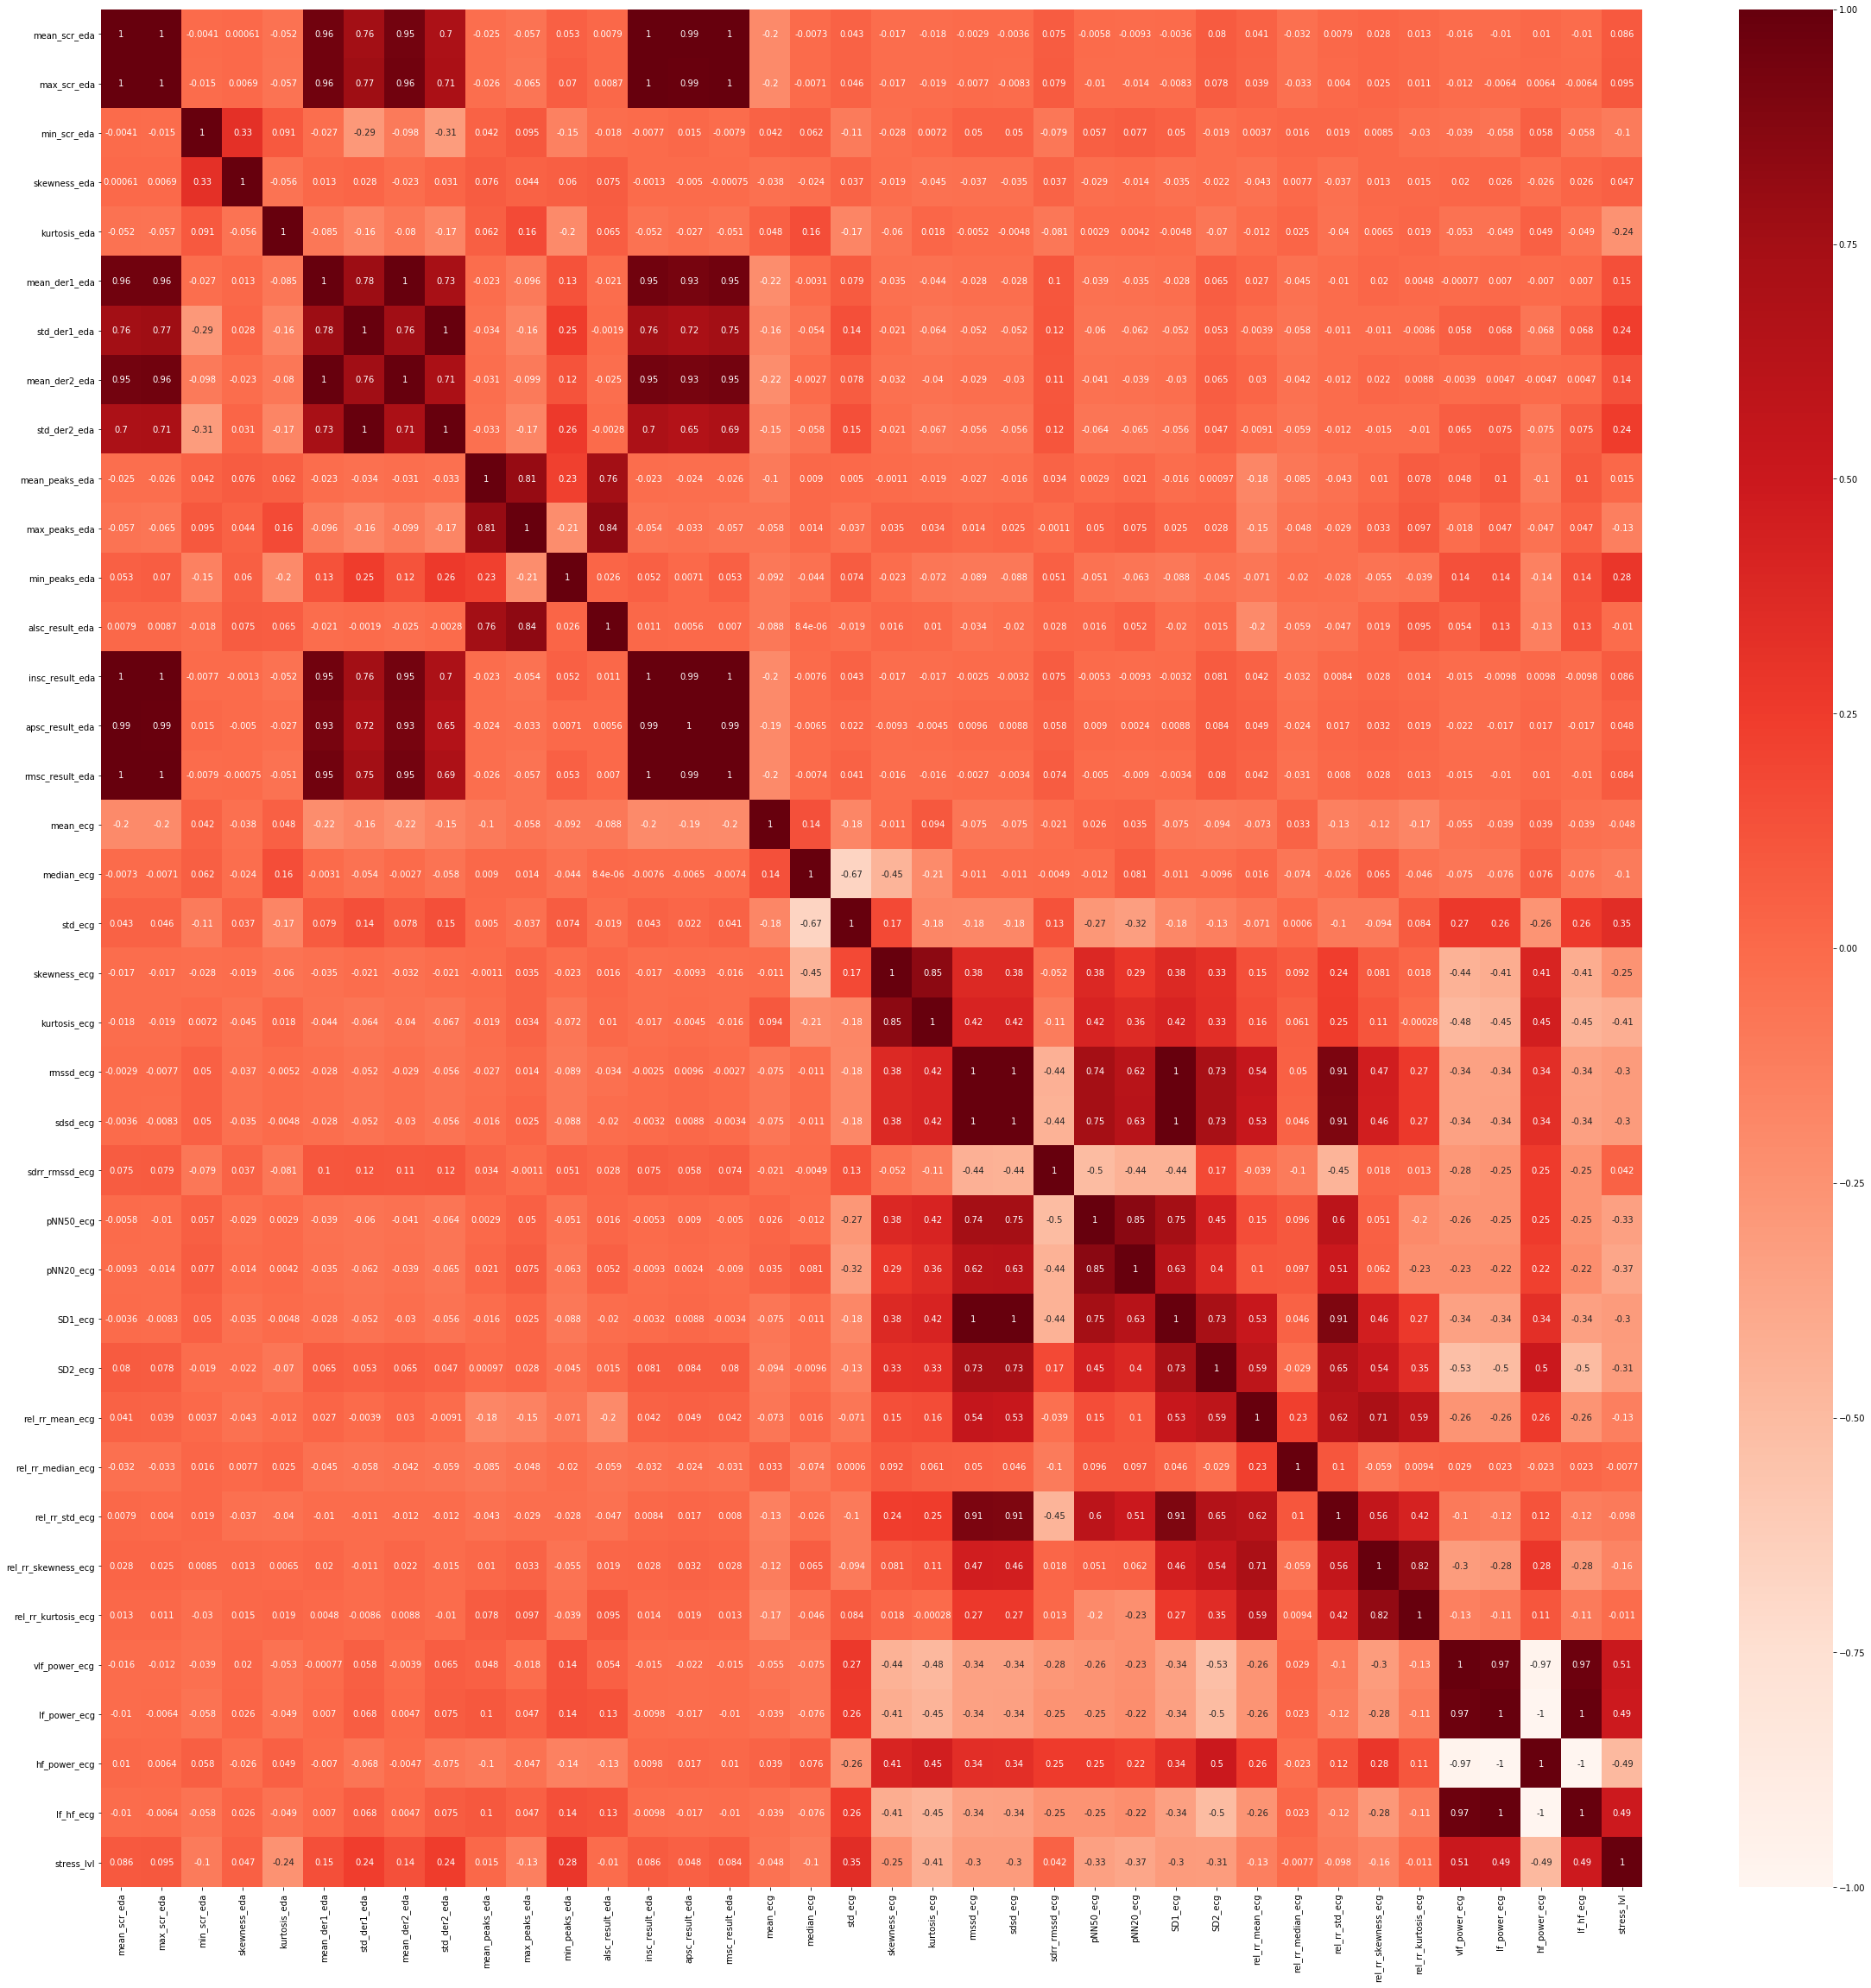

In [5]:
plt.figure(figsize=(40,40))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

----------------------------------------------------
**NOTA**: Más que mostrar los valores, deberías decir con quién están correlacionadas. En tu caso al ser todos los valores bajos hay muy poca correlación entre las variables

----------------------------------------------------

In [6]:
cor_target = abs(cor["stress_lvl"])
relevant_features = cor_target[cor_target>0.3]
relevant_features

std_ecg          0.345782
kurtosis_ecg     0.414915
rmssd_ecg        0.300108
sdsd_ecg         0.300551
pNN50_ecg        0.328320
pNN20_ecg        0.373188
SD1_ecg          0.300551
SD2_ecg          0.306648
vlf_power_ecg    0.514924
lf_power_ecg     0.491234
hf_power_ecg     0.491234
lf_hf_ecg        0.491241
stress_lvl       1.000000
Name: stress_lvl, dtype: float64

In [7]:
# Empezamos con el cálculo del PCA

X = StandardScaler().fit_transform(X)
X

array([[-0.01034454, -0.00243983,  0.50575697, ..., -0.27976377,
         0.27976379, -0.27978978],
       [-0.05809515, -0.06658073,  0.50575697, ..., -1.06587233,
         1.06587222, -1.06572494],
       [-0.06164027, -0.05889427,  0.50575697, ..., -0.4470011 ,
         0.447001  , -0.44699711],
       ...,
       [-0.06659586, -0.08249424,  0.50575697, ..., -0.69479478,
         0.69479453, -0.69473944],
       [-0.05492557, -0.0330941 ,  0.50575697, ..., -0.32705378,
         0.32705357, -0.3270715 ],
       [-0.05907158, -0.06925837,  0.50575697, ..., -1.00329691,
         1.00329631, -1.00316589]])

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,0.606959,1.680933
1,-1.143852,2.453802
2,-0.076851,-0.408597
3,-0.344183,-1.422484
4,-0.300329,-0.742080
...,...,...
1124,-0.625892,2.449813
1125,-0.025562,-0.450472
1126,-0.113008,-1.125996
1127,0.317144,0.276450


In [9]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf

,principal component 1,principal component 2,stress_lvl
0,0.606959,1.680933,2
1,-1.143852,2.453802,2
2,-0.076851,-0.408597,2
3,-0.344183,-1.422484,2
4,-0.300329,-0.742080,2
...,...,...,...
1124,-0.625892,2.449813,1
1125,-0.025562,-0.450472,1
1126,-0.113008,-1.125996,1
1127,0.317144,0.276450,1


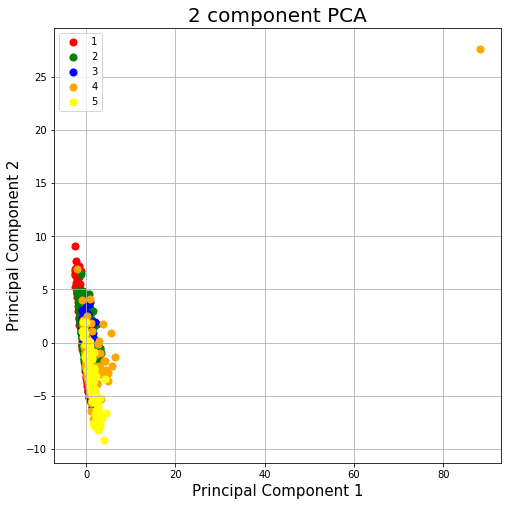

In [10]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['1', '2', '3', '4', '5']
colors = ['r', 'g', 'b', 'orange', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stress_lvl'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [11]:
# Llorando estoy. Vamos a ver con 3 componentes
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf


,principal component 1,principal component 2,principal component 3
0,0.606959,1.680933,1.362639
1,-1.143852,2.453803,0.641373
2,-0.076851,-0.408597,-0.565910
3,-0.344183,-1.422484,-0.189407
4,-0.300329,-0.742080,-0.646185
...,...,...,...
1124,-0.625892,2.449813,0.410435
1125,-0.025563,-0.450471,-3.767242
1126,-0.113008,-1.125996,-3.228641
1127,0.317144,0.276450,-0.925417


In [12]:
finalDf = pd.concat([principalDf, y], axis = 1)
finalDf

,principal component 1,principal component 2,principal component 3,stress_lvl
0,0.606959,1.680933,1.362639,2
1,-1.143852,2.453803,0.641373,2
2,-0.076851,-0.408597,-0.565910,2
3,-0.344183,-1.422484,-0.189407,2
4,-0.300329,-0.742080,-0.646185,2
...,...,...,...,...
1124,-0.625892,2.449813,0.410435,1
1125,-0.025563,-0.450471,-3.767242,1
1126,-0.113008,-1.125996,-3.228641,1
1127,0.317144,0.276450,-0.925417,1


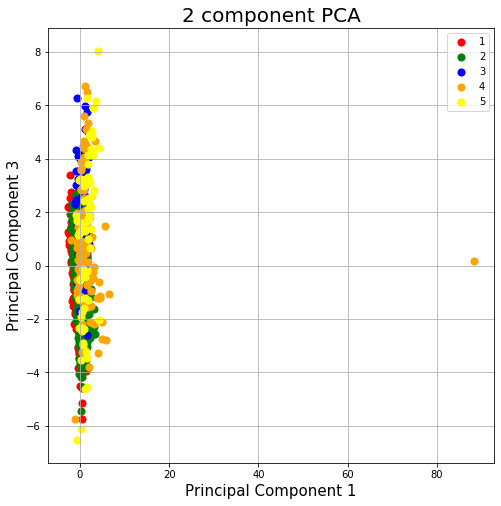

In [13]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['1', '2', '3', '4', '5']
colors = ['r', 'g', 'b', 'orange', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stress_lvl'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

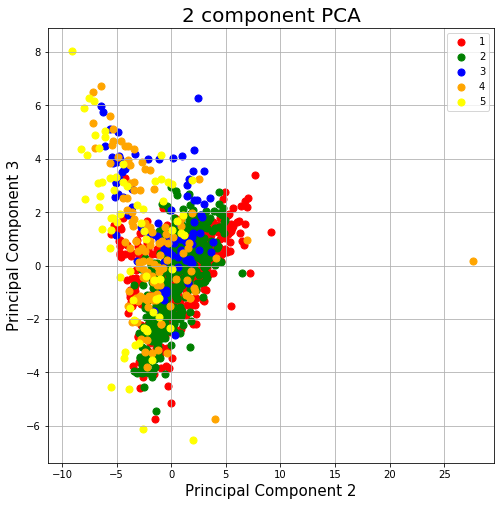

In [14]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['1', '2', '3', '4', '5']
colors = ['r', 'g', 'b', 'orange', 'yellow']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['stress_lvl'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 2']
               , finalDf.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [15]:
print(df.isna().values.any())
dfc = df.copy()
dfn = df.copy()
dfc['stress_lvl'] = dfc['stress_lvl'].astype('category')
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
import math
dfn.dtypes

False


mean_scr_eda           float64
max_scr_eda            float64
min_scr_eda            float64
skewness_eda           float64
kurtosis_eda           float64
mean_der1_eda          float64
std_der1_eda           float64
mean_der2_eda          float64
std_der2_eda           float64
mean_peaks_eda         float64
max_peaks_eda          float64
min_peaks_eda          float64
alsc_result_eda        float64
insc_result_eda        float64
apsc_result_eda        float64
rmsc_result_eda        float64
mean_ecg               float64
median_ecg             float64
std_ecg                float64
skewness_ecg           float64
kurtosis_ecg           float64
rmssd_ecg              float64
sdsd_ecg               float64
sdrr_rmssd_ecg         float64
pNN50_ecg              float64
pNN20_ecg              float64
SD1_ecg                float64
SD2_ecg                float64
rel_rr_mean_ecg        float64
rel_rr_median_ecg      float64
rel_rr_std_ecg         float64
rel_rr_skewness_ecg    float64
rel_rr_k

In [16]:
X.shape

(1129, 37)

In [17]:
from sklearn.model_selection import train_test_split
train_features_c, test_features_c, train_labels_c, test_labels_c = train_test_split(X, dfc['stress_lvl'], test_size = 0.2, random_state=42)
train_features_n, test_features_n, train_labels_n, test_labels_n = train_test_split(X, dfn['stress_lvl'], test_size = 0.2, random_state=42)
#dfc es el categorical
#dfn es el numerico


In [18]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
rf = RandomForestClassifier(n_estimators=150, max_depth=10, oob_score=False, n_jobs=-1)
rf.fit(train_features_c, train_labels_c);

In [19]:
predictions = rf.predict(test_features_c)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', math.sqrt(mean_squared_error(test_labels_c, predictions)), 'degrees.')

Mean Absolute Error: 0.6240036305771396 degrees.


In [20]:
predictions
accuracy = accuracy_score(test_labels_c, predictions)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 0.85 %.


In [21]:
from sklearn import tree
dt = tree.DecisionTreeClassifier(max_depth=8, random_state=1, splitter='best')
dt = tree.DecisionTreeClassifier()
dt.fit(train_features_c, train_labels_c);

---------------------------------------------------------------
**NOTA**: Así no puedes calcular la accuracy en calsificación. Deberías entrenar el modelo específicamente para clasificación. 

Lo interesante sería que para tu TFM hicieras los dos experimentos: regresión y clasifiación. 

-----------------------------------------------------------------

In [22]:
predictions = dt.predict(test_features_c)
print('Mean Absolute Error:', math.sqrt(mean_squared_error(test_labels_c, predictions)), 'degrees.')
accuracy = accuracy_score(test_labels_c, predictions)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.8621849174384849 degrees.
Accuracy: 0.76 %.


In [23]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
mlp = MLPClassifier(max_iter=2000, hidden_layer_sizes=(37,), batch_size=50)
mlp.fit(train_features_c, train_labels_c);

In [24]:
predictions = mlp.predict(test_features_c)
print('Mean Absolute Error:', math.sqrt(mean_squared_error(test_labels_c, predictions)), 'degrees.')
accuracy = accuracy_score(test_labels_c, predictions)
print('Accuracy:', round(accuracy, 3), '%.')
mlp.score(test_features_c, test_labels_c)

Mean Absolute Error: 0.8647471368090611 degrees.
Accuracy: 0.726 %.


0.7256637168141593

In [25]:
from sklearn import svm
svc = svm.SVC(random_state=42)
svc.fit(train_features_c, train_labels_c);

In [26]:
predictions = svc.predict(test_features_c)
print('Mean Absolute Error:', math.sqrt(mean_squared_error(test_labels_c, predictions)), 'degrees.')
accuracy = accuracy_score(test_labels_c, predictions)
print('Accuracy:', round(accuracy, 2), '%.')
svc.score(test_features_c, test_labels_c)

Mean Absolute Error: 0.7814214413660202 degrees.
Accuracy: 0.65 %.


0.6548672566371682

In [27]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
clf = GaussianProcessClassifier(kernel=kernel,random_state=0)
clf.fit(train_features_c, train_labels_c);

In [28]:
predictions = clf.predict(test_features_c)
print('Mean Absolute Error:', math.sqrt(mean_squared_error(test_labels_c, predictions)), 'degrees.')
accuracy = accuracy_score(test_labels_c, predictions)
print('Accuracy:', round(accuracy, 2), '%.')
clf.score(test_features_c, test_labels_c)

Mean Absolute Error: 1.5299372420468005 degrees.
Accuracy: 0.11 %.


0.10619469026548672

In [42]:
# MLP numerico
from sklearn.model_selection import GridSearchCV as gs
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.metrics import balanced_accuracy_score
mlp= MLPRegressor(random_state=42, verbose=False)

# Me faltaría probar diversas arquitecturas de perceptrones
parameters= {'max_iter':[2000], 
             'hidden_layer_sizes':[(100,)],
             'solver':['adam', 'sgd'],
             'batch_size':[50],
             'activation':['logistic', 'tanh', 'relu'],
             'learning_rate':['constant', 'adaptive']}

clf = gs(mlp, parameters,
         scoring='neg_root_mean_squared_error',
         n_jobs=-1,
         cv=10,
         verbose=1)
clf.fit(train_features_n, train_labels_n)

print(clf.best_params_)

print(f"Mejor puntuación de entrenamiento: {clf.best_score_}")

mlp = clf.best_estimator_
predictions = mlp.predict(test_features_n)
print(f"Puntuacion de test: {math.sqrt(mean_squared_error(test_labels_n, predictions))}")

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.5s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.9min finished


{'activation': 'logistic', 'batch_size': 50, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 2000, 'solver': 'adam'}
Mejor puntuación de entrenamiento: -0.8459604314328828
Puntuacion de test: 0.8223395564321652


In [41]:
# MLP categorico
from sklearn.model_selection import GridSearchCV as gs
mlp = MLPClassifier(random_state=42)

parameters= {'max_iter':[2000], 
             'hidden_layer_sizes':[(150,150)],
             'solver':['adam', 'sgd'],
             'batch_size':[50],
             'activation':['logistic', 'tanh', 'relu'],
             'learning_rate':['constant', 'adaptive']}


parameters= {'max_iter':[2000], 
             'hidden_layer_sizes':[(100,), (50,50), (75,25), (33,33,33), (90,)],
             'solver':['adam', 'sgd'],
             'batch_size':[10,50,100,200],
             'activation':['logistic', 'tanh', 'relu'],
             'learning_rate':['constant', 'adaptive']}


clf = gs(mlp, parameters,
         scoring='balanced_accuracy',
         n_jobs=-1,
         cv=3,
         verbose=1)
clf.fit(train_features_c, train_labels_c)

print(clf.best_params_)

print(f"Mejor puntuación de entrenamiento: {clf.best_score_}")
#clf.best_estimator_


mlp = clf.best_estimator_
predictions = mlp.predict(test_features_c)
print(f"Puntuacion de test: {balanced_accuracy_score(test_labels_c, predictions)}")

Fitting 3 folds for each of 240 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 13.2min finished


{'activation': 'relu', 'batch_size': 100, 'hidden_layer_sizes': (50, 50), 'learning_rate': 'adaptive', 'max_iter': 2000, 'solver': 'sgd'}
Mejor puntuación de entrenamiento: 0.7348683749568957
Puntuacion de test: 0.7391991846243448


In [32]:
# RANDOM FOREST CLASSIFIER
from sklearn.model_selection import GridSearchCV as gs
from sklearn.metrics import balanced_accuracy_score
rf = RandomForestClassifier(random_state=42)

parameters= [{'n_estimators':[30,50,75],
             'max_depth':[5,7,10], 
             'max_features': [6,7,8],
             'min_samples_leaf': [2,3,5],
             'min_samples_split':[2,4,5]}]

clf = gs(rf, parameters,
         scoring='balanced_accuracy',
         n_jobs=-1,
         cv=10,
         verbose=1)
clf.fit(train_features_c, train_labels_c)

print(clf.best_params_)

print(f"Mejor puntuación de entrenamiento: {clf.best_score_}")

rf = clf.best_estimator_

predictions = rf.predict(test_features_c)
print(f"Puntuacion de test: {balanced_accuracy_score(test_labels_c, predictions)}")

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   51.2s


{'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 30}
Mejor puntuación de entrenamiento: 0.8033929036912909
Puntuacion de test: 0.8008842943117841


[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed:  1.2min finished


In [33]:
# RANDOM FOREST REGRESSOR
from sklearn.model_selection import GridSearchCV as gs
rf = RandomForestRegressor(random_state=42)

# He ido recortando parámetros porque he detectado overfitting
parameters= [{'n_estimators':[25,50,75],
             'max_depth':[5,7,10], 
             'max_features': [12,13,14],
             'min_samples_leaf': [2,3],
             'min_samples_split':[2,4,5]}]

clf = gs(rf, parameters,
         scoring='neg_root_mean_squared_error',
         n_jobs=-1,
         cv=10,
         verbose=1)

clf.fit(train_features_n, train_labels_n)

print(clf.best_params_)

print(f"Mejor puntuación de entrenamiento: {clf.best_score_}")
test = clf.best_estimator_

predictions = test.predict(test_features_n)
print(f"Puntuacion de test: {math.sqrt(mean_squared_error(test_labels_n, predictions))}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 162 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   54.3s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:   57.3s finished


{'max_depth': 10, 'max_features': 14, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mejor puntuación de entrenamiento: -0.6404622948734893
Puntuacion de test: 0.5227105592174157


In [34]:
# DECISION TREE CLASSIFIER
from sklearn.model_selection import GridSearchCV as gs
dt = tree.DecisionTreeClassifier(random_state=42)
parameters= [{'criterion':["gini", "entropy"],
              'splitter':["best","random"],
              'max_depth':[5,7,8,10,13,15, None],
              'max_leaf_nodes':[50,70,100, None],
              'max_features': [3, 10, 15, "sqrt", "log2"]}]
clf = gs(dt, parameters,
         scoring='balanced_accuracy',
         n_jobs=-1,
         cv=10,
         verbose=1)
clf.fit(train_features_c, train_labels_c)

print(clf.best_params_)

print(f"Mejor puntuación de entrenamiento: {clf.best_score_}")
dt = clf.best_estimator_

predictions = dt.predict(test_features_c)
print(f"Puntuacion de test: {balanced_accuracy_score(test_labels_c, predictions)}")

Fitting 10 folds for each of 560 candidates, totalling 5600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 3824 tasks      | elapsed:    4.0s


{'criterion': 'entropy', 'max_depth': 15, 'max_features': 10, 'max_leaf_nodes': 70, 'splitter': 'best'}
Mejor puntuación de entrenamiento: 0.7721049376250988
Puntuacion de test: 0.7493564356435644


[Parallel(n_jobs=-1)]: Done 5585 out of 5600 | elapsed:    6.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 5600 out of 5600 | elapsed:    6.1s finished


In [35]:
# DECISION TREE REGRESSOR
from sklearn.model_selection import GridSearchCV as gs
dt = tree.DecisionTreeRegressor(random_state=42)
parameters= [{'criterion':["mse", "friedman_mse", "mae"],
              'splitter':["best","random"],
              'max_depth':[5,7,8,10,13,15, None],
              'max_leaf_nodes':[50,70,100, None],
              'max_features': [3, 10, 15, "sqrt", "log2"]}]
clf = gs(dt, parameters,
         scoring='neg_root_mean_squared_error',
         n_jobs=-1,
         cv=10,
         verbose=1)
clf.fit(train_features_n, train_labels_n)

print(clf.best_params_)

print(f"Mejor puntuación de entrenamiento: {clf.best_score_}")
test = clf.best_estimator_

predictions = test.predict(test_features_n)
print(f"Puntuacion de test: {math.sqrt(mean_squared_error(test_labels_n, predictions))}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


Fitting 10 folds for each of 840 candidates, totalling 8400 fits


[Parallel(n_jobs=-1)]: Done 6640 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done 8048 tasks      | elapsed:   16.7s


{'criterion': 'mse', 'max_depth': 5, 'max_features': 15, 'max_leaf_nodes': 50, 'splitter': 'best'}
Mejor puntuación de entrenamiento: -0.8203533029730492
Puntuacion de test: 0.7524176217847091


[Parallel(n_jobs=-1)]: Done 8385 out of 8400 | elapsed:   19.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 8400 out of 8400 | elapsed:   19.3s finished


In [36]:
# Support Vector Classification
from sklearn.model_selection import GridSearchCV as gs
from sklearn import svm
svc = svm.SVC(random_state=42)

parameters= [{'kernel':["poly", "rbf", "sigmoid"],
              'gamma':["scale","auto", 0.045],
              'shrinking':[True, False], #Heuristica
              'degree':[1,3,5,7,10],
              'C':[1, 2, 3,4,5],
              'max_iter':[-1]}]
clf = gs(svc, parameters,
         scoring='balanced_accuracy',
         n_jobs=-1,
         cv=10,
         verbose=1)

clf.fit(train_features_c, train_labels_c)

print(clf.best_params_)

print(f"Mejor puntuación de entrenamiento: {clf.best_score_}")
svc = clf.best_estimator_

predictions = svc.predict(test_features_c)
print(f"Puntuacion de test: {balanced_accuracy_score(test_labels_c, predictions)}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 656 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1656 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:   23.1s


{'C': 5, 'degree': 1, 'gamma': 0.045, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True}
Mejor puntuación de entrenamiento: 0.7287102709118838
Puntuacion de test: 0.6908464375849349


[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:   33.8s finished


In [37]:
# Support Vector Regression
from sklearn.model_selection import GridSearchCV as gs
svr = svm.SVR()

parameters= [{'kernel':["poly", "rbf", "sigmoid"],
              'gamma':["scale","auto", 0.045],
              'shrinking':[True, False], #Heuristica
              'degree':[1,3,5,7,10],
              'C':[3,3.5,4,4.5],
              'max_iter':[-1]}]

clf = gs(svr, parameters,
         scoring='neg_root_mean_squared_error',
         n_jobs=-1,
         cv=10,
         verbose=1)
clf.fit(train_features_n, train_labels_n)

print(clf.best_params_)

print(f"Mejor puntuación de entrenamiento: {clf.best_score_}")
test = clf.best_estimator_

predictions = test.predict(test_features_n)
print(f"Puntuacion de test: {math.sqrt(mean_squared_error(test_labels_n, predictions))}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 360 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:   47.5s


{'C': 3.5, 'degree': 1, 'gamma': 0.045, 'kernel': 'rbf', 'max_iter': -1, 'shrinking': False}
Mejor puntuación de entrenamiento: -0.7454984435771732
Puntuacion de test: 0.6462652814411567


[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:   48.1s finished


In [38]:
# KNeighborsClassifier
from sklearn.model_selection import GridSearchCV as gs
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()

parameters= [{'n_neighbors':[2,3,5,7],
             'algorithm': ["ball_tree", "kd_tree", "brute"],
             'weights': ["uniform", "distance"]}]
clf = gs(knc, parameters,
         scoring='balanced_accuracy',
         n_jobs=-1,
         cv=10,
         verbose=1)
clf.fit(train_features_c, train_labels_c)

print(clf.best_params_)

print(f"Mejor puntuación de entrenamiento: {clf.best_score_}")
knc = clf.best_estimator_

predictions = knc.predict(test_features_c)
print(f"Puntuacion de test: {balanced_accuracy_score(test_labels_c, predictions)}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s


{'algorithm': 'ball_tree', 'n_neighbors': 3, 'weights': 'distance'}
Mejor puntuación de entrenamiento: 0.6879178536517245
Puntuacion de test: 0.6264356435643564


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.5s finished


In [39]:
# KNeighborsRegressor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

parameters= [{'n_neighbors':[2,3,5,7],
             'algorithm': ["brute", "kd_tree", "ball_tree"],
             'weights': ['uniform', 'distance']}]
clf = gs(estimator=knr, param_grid=parameters,
         scoring='neg_root_mean_squared_error',
         n_jobs=-1,
         cv=10,
         verbose=1)
clf.fit(train_features_n, train_labels_n)

print(clf.best_params_)

print(f"Mejor puntuación de entrenamiento: {clf.best_score_}")
test = clf.best_estimator_

predictions = test.predict(test_features_n)
print(f"Puntuacion de test: {math.sqrt(mean_squared_error(test_labels_n, predictions))}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s


Fitting 10 folds for each of 24 candidates, totalling 240 fits
{'algorithm': 'brute', 'n_neighbors': 7, 'weights': 'distance'}
Mejor puntuación de entrenamiento: -0.8011510412525944
Puntuacion de test: 0.6559158500557206


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.4s finished
